<a href="https://colab.research.google.com/github/kingy260/Project_2/blob/main/AER850_Project2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#AER850 Project 2 STEP 5
#Shayaan Shaikh
from google.colab import drive
drive.mount("/content/drive")

Mounted at /content/drive


In [29]:
import numpy as np
import tensorflow as tf
from tensorflow.keras import datasets, layers, models, Sequential
from tensorflow.keras import layers
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.regularizers import l2
from tensorflow.keras.optimizers import Adam
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# data directories
train_data_dir = "/content/drive/My Drive/AER850/Project2/Project_2/Project2Data/Data/train"
val_data_dir = "/content/drive/My Drive/AER850/Project2/Project_2/Project2Data/Data/valid"
test_data_dir = "/content/drive/My Drive/AER850/Project2/Project_2/Project2Data/Data/test"

##STEP 1
# defined image shape
im_shape = (100,100);

# Create an ImageDataGenerator for data augmentation
train_datagen = ImageDataGenerator(
    rescale=1./255,  # Normalize the pixel values
    shear_range=0.2,
    horizontal_flip=True,
    vertical_flip=True,
    zoom_range=0.2,
    rotation_range=20
)

# Create an ImageDataGenerator for validation and test data (no augmentation, just rescaling)
valid_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)

# Use the generators to load the images
train_data = train_datagen.flow_from_directory(
    train_data_dir,
    target_size=im_shape,
    batch_size=32,
    class_mode='categorical',
    color_mode='grayscale'
)

validation_data = valid_datagen.flow_from_directory(
    val_data_dir,
    target_size=im_shape,
    batch_size=32,
    class_mode='categorical',
    color_mode='grayscale'
)

test_data = test_datagen.flow_from_directory(
    test_data_dir,
    target_size=im_shape,
    batch_size=32,
    class_mode='categorical',
    color_mode='grayscale'
)


# stopping criteria is a validation accuracy that doesnt increase over 30 epochs
early_stopping = EarlyStopping(
    monitor='val_accuracy',
    patience=30,
    restore_best_weights=True,
    mode='max',
    verbose=1
)

# learning rate adjustments
lr_adj = tf.keras.callbacks.ReduceLROnPlateau(
    monitor='val_loss', factor=0.5, patience=7, min_lr=1e-6
)

Found 1941 images belonging to 3 classes.
Found 431 images belonging to 3 classes.
Found 539 images belonging to 3 classes.


Model: "sequential_20"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_28 (Conv2D)                   │ (None, 98, 98, 256)         │           2,560 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_28 (MaxPooling2D)      │ (None, 49, 49, 256)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_29 (Conv2D)                   │ (None, 47, 47, 128)         │         295,040 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_30 (Conv2D)                   │ (None, 45, 45, 64)          │          73,792 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_29 (MaxPooling2D)      │ (None, 22, 22, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_7 (Flatten)                  │ (None, 30976)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_14 (Dense)                     │ (None, 256)                 │       7,930,112 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_15 (Dense)                     │ (None, 3)                   │             771 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 8,302,275 (31.67 MB)

 Trainable params: 8,302,275 (31.67 MB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/20
61/61 ━━━━━━━━━━━━━━━━━━━━ 29s 350ms/step - accuracy: 0.4047 - loss: 1.1397 - val_accuracy: 0.6450 - val_loss: 0.7414 - learning_rate: 0.0010
Epoch 2/20
61/61 ━━━━━━━━━━━━━━━━━━━━ 15s 220ms/step - accuracy: 0.6440 - loss: 0.7664 - val_accuracy: 0.6682 - val_loss: 0.8084 - learning_rate: 0.0010
Epoch 3/20
61/61 ━━━━━━━━━━━━━━━━━━━━ 20s 212ms/step - accuracy: 0.7109 - loss: 0.6585 - val_accuracy: 0.5313 - val_loss: 1.1383 - learning_rate: 0.0010
Epoch 4/20
61/61 ━━━━━━━━━━━━━━━━━━━━ 14s 214ms/step - accuracy: 0.6705 - loss: 0.7367 - val_accuracy: 0.6798 - val_loss: 0.7393 - learning_rate: 0.0010
Epoch 5/20
61/61 ━━━━━━━━━━━━━━━━━━━━ 21s 216ms/step - accuracy: 0.7161 - loss: 0.6132 - val_accuracy: 0.6473 - val_loss: 0.7340 - learning_rate: 0.0010
Epoch 6/20
61/61 ━━━━━━━━━━━━━━━━━━━━ 20s 216ms/step - accuracy: 0.7394 - loss: 0.5875 - val_accuracy: 0.6566 - val_loss: 0.6824 - learning_rate: 0.0010
Epoch 7/20
61/61 ━━━━━━━━━━━━━━━━━━━━ 21s 217ms/step - accuracy: 0.7732 - loss: 0.

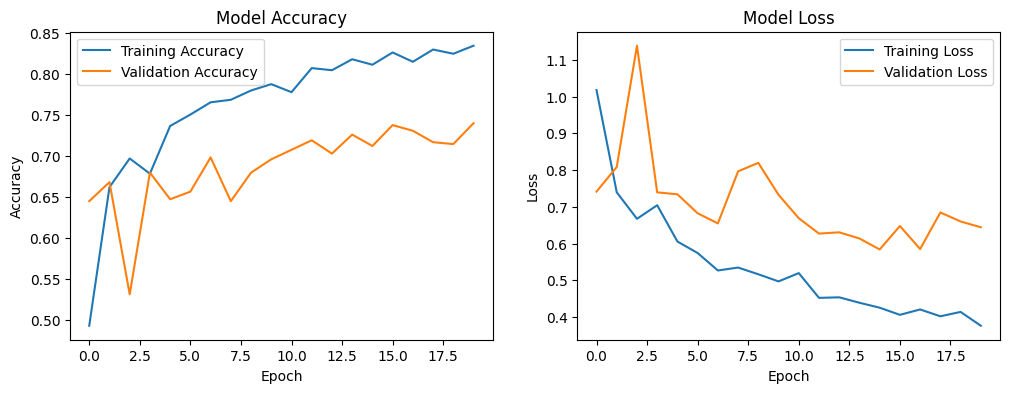

In [31]:
#STEP 2
# FIRST CNN, OVERFIT
# sequential model
model_overfit = Sequential()

# conv layer w/ 256 4x4 kernels
model_overfit.add(Conv2D(256, (3, 3), activation='relu', input_shape=(100, 100, 1)))
# 2X2 max pooling layer
model_overfit.add(MaxPooling2D(pool_size=(2, 2)))

# conv layer with 128 3x3 kernels, ReLU acitvation function
model_overfit.add(Conv2D(128, (3, 3), activation='relu'))
model_overfit.add(Conv2D(64, (3, 3), activation='relu'))
# 2X2 max pooling layer
model_overfit.add(MaxPooling2D(pool_size=(2, 2)))

# flatten
model_overfit.add(Flatten())
# dense layer with 256 neurons
model_overfit.add(Dense(256, activation='relu'))
# output Layer with 3 classes (crack, missing head, paint off)
model_overfit.add(Dense(3, activation='softmax'))
# compile the model
model_overfit.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
# display the model's architecture
model_overfit.summary()

#RUNNING FIRST MODEL

# train the model
history = model_overfit.fit(
    train_data,
    epochs=20,
    validation_data=validation_data,
    callbacks=[early_stopping,lr_adj] #stopping criteria
)

# run on test data
test_loss, test_acc = model_overfit.evaluate(test_data)
print(f'Test accuracy: {test_acc:.4f}')

# plot loss and accuracy curves
plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.show()


Model: "sequential_19"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_24 (Conv2D)                   │ (None, 98, 98, 16)          │             160 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_24               │ (None, 98, 98, 16)          │              64 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_24 (MaxPooling2D)      │ (None, 49, 49, 16)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_25 (Conv2D)                   │ (None, 47, 47, 32)          │           4,640 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_25               │ (None, 47, 47, 32)          │             128 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_25 (MaxPooling2D)      │ (None, 23, 23, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_26 (Conv2D)                   │ (None, 21, 21, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_26               │ (None, 21, 21, 64)          │             256 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_26 (MaxPooling2D)      │ (None, 10, 10, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_27 (Conv2D)                   │ (None, 8, 8, 128)           │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_27               │ (None, 8, 8, 128)           │             512 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_27 (MaxPooling2D)      │ (None, 4, 4, 128)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_6 (Dropout)                  │ (None, 4, 4, 128)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_6 (Flatten)                  │ (None, 2048)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_12 (Dense)                     │ (None, 256)                 │         524,544 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_13 (Dense)                     │ (None, 3)                   │             771 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 623,427 (2.38 MB)

 Trainable params: 622,947 (2.38 MB)

 Non-trainable params: 480 (1.88 KB)

Epoch 1/20


/usr/local/lib/python3.10/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:122: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


61/61 ━━━━━━━━━━━━━━━━━━━━ 37s 475ms/step - accuracy: 0.6015 - loss: 6.1279 - val_accuracy: 0.3921 - val_loss: 5.0870 - learning_rate: 0.0010
Epoch 2/20
61/61 ━━━━━━━━━━━━━━━━━━━━ 21s 220ms/step - accuracy: 0.7293 - loss: 4.4861 - val_accuracy: 0.3968 - val_loss: 4.2680 - learning_rate: 0.0010
Epoch 3/20
61/61 ━━━━━━━━━━━━━━━━━━━━ 16s 207ms/step - accuracy: 0.7664 - loss: 3.4419 - val_accuracy: 0.3921 - val_loss: 4.4304 - learning_rate: 0.0010
Epoch 4/20
61/61 ━━━━━━━━━━━━━━━━━━━━ 18s 210ms/step - accuracy: 0.8016 - loss: 2.6683 - val_accuracy: 0.3921 - val_loss: 3.4747 - learning_rate: 0.0010
Epoch 5/20
61/61 ━━━━━━━━━━━━━━━━━━━━ 14s 205ms/step - accuracy: 0.7956 - loss: 2.1727 - val_accuracy: 0.5824 - val_loss: 2.2931 - learning_rate: 0.0010
Epoch 6/20
61/61 ━━━━━━━━━━━━━━━━━━━━ 20s 198ms/step - accuracy: 0.8162 - loss: 1.7648 - val_accuracy: 0.5197 - val_loss: 2.0235 - learning_rate: 0.0010
Epoch 7/20
61/61 ━━━━━━━━━━━━━━━━━━━━ 21s 203ms/step - accuracy: 0.8312 - loss: 1.4936 - val_

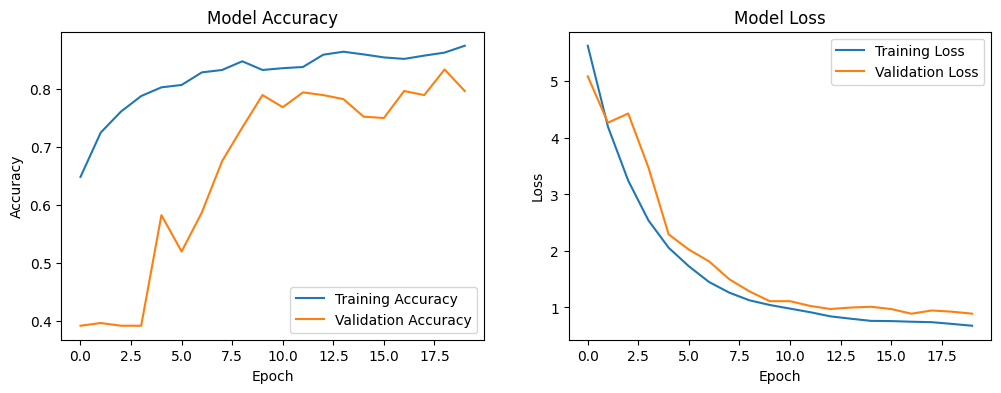

In [30]:
#STEP 3 AND STEP 4
# SECOND CNN, TUNED
# sequential model
model_tuned = Sequential()

# conv layer w/ 256 4x4 kernels
model_tuned.add(Conv2D(16, (3, 3), activation='relu', input_shape=(100, 100, 1), kernel_regularizer=l2(0.001)))
model_tuned.add(BatchNormalization())
# 2X2 max pooling layer
model_tuned.add(MaxPooling2D(pool_size=(2, 2)))
# normalization and dropout layers to help overfitting

# conv layer with 128 3x3 kernels, ReLU acitvation function
model_tuned.add(Conv2D(32, (3, 3), activation='relu',kernel_regularizer=l2(0.001)))
model_tuned.add(BatchNormalization())
# # 2X2 max pooling layer
model_tuned.add(MaxPooling2D(pool_size=(2, 2)))

# conv layer with 128 3x3 kernels, ReLU acitvation function
model_tuned.add(Conv2D(64, (3, 3), activation='relu',kernel_regularizer=l2(0.002)))
model_tuned.add(BatchNormalization())
# # 2X2 max pooling layer
model_tuned.add(MaxPooling2D(pool_size=(2, 2)))

# conv layer with 128 3x3 kernels, ReLU acitvation function
model_tuned.add(Conv2D(128, (3, 3), activation='relu',kernel_regularizer=l2(0.004)))
model_tuned.add(BatchNormalization())
# # 2X2 max pooling layer
model_tuned.add(MaxPooling2D(pool_size=(2, 2)))
# # normalization and dropout layers to help overfitting
model_tuned.add(Dropout(0.3))

# flatten
model_tuned.add(Flatten())
# dense layer with 256 neurons and l2 regularization
model_tuned.add(Dense(256, activation='relu', kernel_regularizer=l2(0.01)))
# output Layer with 3 classes (crack, missing head, paint off)
model_tuned.add(Dense(3, activation='softmax'))
# compile the model
model_tuned.compile(optimizer=Adam(learning_rate=0.001), loss='categorical_crossentropy', metrics=['accuracy'])
# display the model's architecture
model_tuned.summary()


#RUNNING SECOND MODEL
# train the model
history2 = model_tuned.fit(
    train_data,
    epochs=20,
    validation_data=validation_data,
    callbacks=[early_stopping,lr_adj] #stopping criteria and learning rate adjustment
)

# run on test data
test_loss2, test_acc2 = model_tuned.evaluate(test_data)
print(f'Test accuracy: {test_acc2:.4f}')

# plot loss and accuracy curves
plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 1)
plt.plot(history2.history['accuracy'], label='Training Accuracy')
plt.plot(history2.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history2.history['loss'], label='Training Loss')
plt.plot(history2.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.show()

In [32]:
#save the models
model_overfit.save('/content/drive/My Drive/AER850/Project2/Project_2/model_overfit.keras')
model_tuned.save('/content/drive/My Drive/AER850/Project2/Project_2/model_tuned.keras')